<a href="https://colab.research.google.com/github/krsmith/DS-Sprint-01-Dealing-With-Data/blob/master/module3-basicdatavisualizations/Plotting_Playground.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/barh.html#sphx-glr-gallery-lines-bars-and-markers-barh-py
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.barh(y_pos, performance, xerr=error, align='center',
        color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

plt.show()

In [0]:
# Adapted to piechart
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_features.html#sphx-glr-gallery-pie-and-polar-charts-pie-features-py

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = ('Tom', 'Dick', 'Harry', 'Slim', 'Jim')
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

ax.pie(performance, labels=people)
ax.set_title('How fast do you want to go today?')

plt.show()


In [0]:
# https://matplotlib.org/gallery/lines_bars_and_markers/scatter_demo2.html#sphx-glr-gallery-lines-bars-and-markers-scatter-demo2-py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]  # get the most recent 250 trading days

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15 * price_data.volume[:-2] / price_data.volume[0])**2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=15)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=15)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

In [0]:
# https://matplotlib.org/gallery/mplot3d/scatter3d.html#sphx-glr-gallery-mplot3d-scatter3d-py
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = 100

# For each set of style and range settings, plot n random points in the box
# defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
for c, m, zlow, zhigh in [('r', 'o', -50, -25), ('b', '^', -30, -5)]:
    xs = randrange(n, 23, 32)
    ys = randrange(n, 0, 100)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, marker=m)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

# Plot Assignment

Draw at least 3 plots with the data you loaded yesterday.

In [1]:
import pandas as pd

b_cancer = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'


'''
Attribute Information:
   1. Sample code number            id number
   2. Clump Thickness               1 - 10
   3. Uniformity of Cell Size       1 - 10
   4. Uniformity of Cell Shape      1 - 10
   5. Marginal Adhesion             1 - 10
   6. Single Epithelial Cell Size   1 - 10
   7. Bare Nuclei                   1 - 10
   8. Bland Chromatin               1 - 10
   9. Normal Nucleoli               1 - 10
  10. Mitoses                       1 - 10
  11. Class:                        2 for benign, 4 for malignant
  '''

col_names = ['code_number', 'clump_thickness',
             'cell_size_uniformity', 'cell_shape_uniformity',
             'marginal_adhesion', 'single_ep',
             'bare_nuclei', 'bland_chromatin',
             'normal_nucleoli', 'mitoses',
             'class']

bc_data = pd.read_csv(b_cancer, header=None, names=col_names)
bc_data.head()

,code_number,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [101]:
# Need to clean up the missing values which are showing as '?' in the data
bc_data = pd.read_csv(b_cancer, header=None, names=col_names, na_values=['?'])
bc_data.isna().sum().sum()

16

In [99]:
import numpy as np

bc_data = pd.read_csv(b_cancer, header=None, names=col_names)
bc_data.replace('?', np.nan, inplace=True)
bc_data.isna().sum().sum()

16

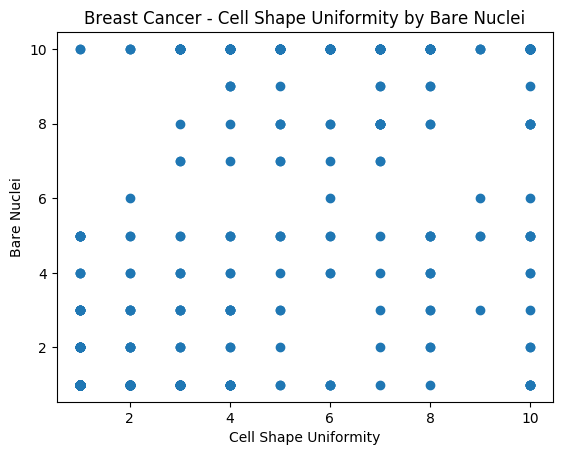

In [102]:
import matplotlib.pyplot as plt

plt.scatter(bc_data['cell_shape_uniformity'], bc_data['bare_nuclei'])

plt.title('Breast Cancer - Cell Shape Uniformity by Bare Nuclei')
plt.ylabel("Bare Nuclei")
plt.xlabel("Cell Shape Uniformity");

## Scatterplot Summary

####"What insight do your plots give you in the data?" 

There doesn't look to be much correlation between the two attributes of these breast cancer clumps. Both attributes tend to be lower, but both have outliers.

####"What was most challenging about making plots?"

This scatterplot was pretty straight forward.

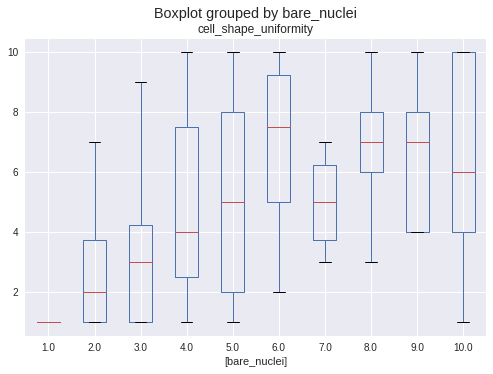

In [41]:
# Boxplot with pandas

bc_data.boxplot(column=['cell_shape_uniformity'], by=['bare_nuclei'])

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


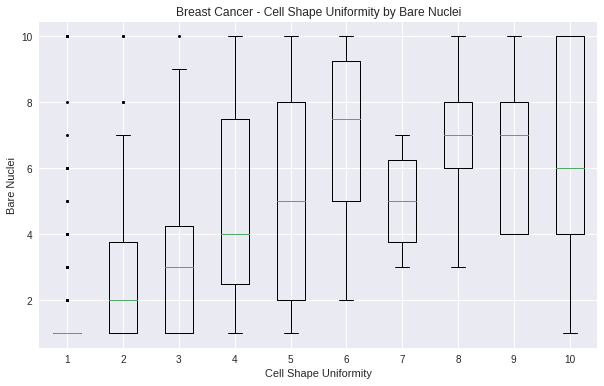

In [57]:
# Boxplot with Matplotlib

grouped_bc = bc_data['cell_shape_uniformity'].groupby(bc_data['bare_nuclei'])

bp_data = [group for name, group in grouped_bc]

fig, ax1 = plt.subplots(figsize=(10,6)) # Sizing the graph itself
bp = plt.boxplot(bp_data, sym='k.', showfliers=True) # showfliers will plot the outliers

ax1.set_title('Breast Cancer - Cell Shape Uniformity by Bare Nuclei')
ax1.set_xlabel('Cell Shape Uniformity')
ax1.set_ylabel('Bare Nuclei')

plt.show()

## Boxplot Summary

####"What insight do your plots give you in the data?" 

As Cell Shape Uniformity rises, so does Bare Nuclei. 

####"What was most challenging about making plots?"

As we saw in the lecture, making the boxplot with the grouping was more complex than the scatterplot creation. 

In [110]:
mapping = {2: 'Benign', 4: 'Malignant'}
bc_data_rep = bc_data.replace({'class': mapping})
bc_data_rep.convert_objects()
bc_data_rep.head(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until


,code_number,clump_thickness,cell_size_uniformity,cell_shape_uniformity,marginal_adhesion,single_ep,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,Benign
1,1002945,5,4,4,5,7,10.0,3,2,1,Benign
2,1015425,3,1,1,1,2,2.0,3,1,1,Benign
3,1016277,6,8,8,1,3,4.0,3,7,1,Benign
4,1017023,4,1,1,3,2,1.0,3,1,1,Benign
5,1017122,8,10,10,8,7,10.0,9,7,1,Malignant
6,1018099,1,1,1,1,2,10.0,3,1,1,Benign
7,1018561,2,1,2,1,2,1.0,3,1,1,Benign
8,1033078,2,1,1,1,2,1.0,1,1,5,Benign
9,1033078,4,2,1,1,2,1.0,2,1,1,Benign


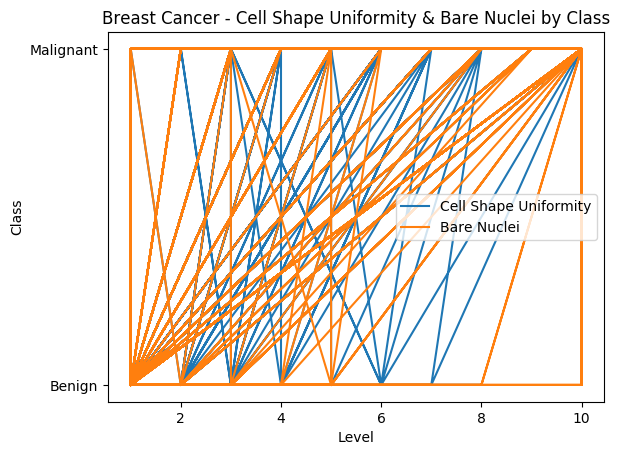

In [111]:
# Bar plot with matplotlib

fig, ax = plt.subplots()

ax.plot(bc_data_rep['cell_shape_uniformity'], bc_data_rep['class'], label='Cell Shape Uniformity')
ax.plot(bc_data_rep['bare_nuclei'], bc_data_rep['class'], label='Bare Nuclei')
ax.legend()
plt.title('Breast Cancer - Cell Shape Uniformity & Bare Nuclei by Class')
plt.ylabel("Class")
plt.xlabel("Level");

plt.show()


## Plot Summary

####"What insight do your plots give you in the data?" 

I added in Class to this plot and compared Cell Shape Uniformity by Class to Bare Nuclei by Class (Class being whether the clump tested as malignant (4) or benign (2)). Each of the two attributes show that at any level, they could be malignant, but when they are lower, the chances are greater that they will be benign.

####"What was most challenging about making plots?"



Text(0.5,0.98,'Categorical Plotting')

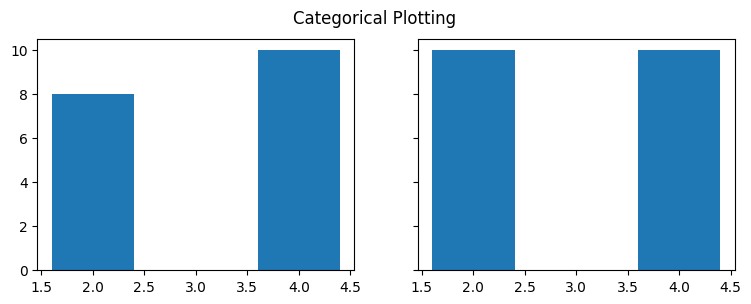

In [85]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3), sharey=True)
axs[0].bar(bc_data['class'], bc_data['cell_shape_uniformity'])
axs[1].bar(bc_data['class'], bc_data['bare_nuclei'])

fig.suptitle('Categorical Plotting')